In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy import interpolate

In [3]:
malesmoke = pd.read_csv('share-of-men-who-are-smoking.csv')
femalesmoke = pd.read_csv('share-of-women-who-are-smoking.csv')

tobacco1pd = pd.merge(malesmoke,femalesmoke, on ='Entity', how = 'outer', suffixes= ('Male', 'Female'))

In [9]:
tobacco1pd.groupby('Entity')
len (tobacco1pd['Entity'].value_counts())

162

In [15]:
mypath = 'Data'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [29]:
onlyfiles

['smoking-deaths-by-age.csv',
 'share-of-men-who-are-smoking.csv',
 'number-of-deaths-from-tobacco-smoking.csv',
 'number-of-total-daily-smokers.csv',
 'consumption-per-smoker-per-day.csv',
 'share-of-women-who-are-smoking.csv',
 'average-price-of-a-pack-of-cigarettes.csv']

In [21]:
dfs = [pd.read_csv("Data/" + x) for x in onlyfiles]

In [28]:
for df in dfs:
    print(df.columns.values)

['Entity' 'Code' 'Year' '70+ years old (deaths)'
 '15-49 years old (deaths)' '50-69 years old (deaths)']
['Entity' 'Code' 'Year' ' (% of adults)']
['Entity' 'Code' 'Year' 'Tobacco smoking']
['Entity' 'Code' 'Year'
 'Number of daily smokers - both (IHME, GHDx (2012))']
['Entity' 'Code' 'Year'
 'Cigarette consumption per smoker per day (cigarettes)']
['Entity' 'Code' 'Year' ' (% of adults)']
['Entity' 'Code' 'Year'
 'Indicator:Average -  cigarette price in international dollars (international-$)']


In [25]:
df_new = pd.DataFrame(columns= ['Entity','Code',"Year"])
for df in dfs:
    df_new = pd.merge(df_new,df,how = 'outer', on =['Entity','Code','Year'])

In [27]:
df_new

,Entity,Code,Year,70+ years old (deaths),15-49 years old (deaths),50-69 years old (deaths),(% of adults)_x,Tobacco smoking,"Number of daily smokers - both (IHME, GHDx (2012))",Cigarette consumption per smoker per day (cigarettes),(% of adults)_y,Indicator:Average - cigarette price in international dollars (international-$)
0,Afghanistan,AFG,1990,1246.238030,2053.685070,3497.160641,NaN,6797.0,652030.0,5.800000,NaN,NaN
1,Afghanistan,AFG,1995,1974.935625,3094.630541,5519.810761,NaN,10589.0,1028533.0,4.500000,NaN,NaN
2,Afghanistan,AFG,2000,2429.371353,3757.903014,6799.480998,NaN,12987.0,1228925.0,3.700000,NaN,NaN
3,Afghanistan,AFG,2005,2848.213811,4537.789004,8483.815984,NaN,15870.0,1504433.0,4.000000,NaN,NaN
4,Afghanistan,AFG,2006,2951.940806,4653.880863,8730.749271,NaN,16337.0,1553745.0,4.100000,NaN,NaN
5,Afghanistan,AFG,2010,3306.430594,4953.975423,9416.096613,NaN,17677.0,1743624.0,4.900000,NaN,NaN
6,Afghanistan,AFG,2016,4057.745075,5888.611941,11005.558639,NaN,20952.0,NaN,NaN,NaN,NaN
7,Albania,ALB,1990,1118.952520,195.664903,976.852299,NaN,2291.0,482850.0,16.400000,NaN,NaN
8,Albania,ALB,1995,1210.307920,207.313356,1059.088298,NaN,2477.0,483593.0,16.100000,NaN,NaN
9,Albania,ALB,2000,1471.491695,288.469209,1164.872762,56.9,2925.0,461078.0,16.799999,11.6,NaN


In [46]:
#tells us how many missing values there are per column
df_new.isnull().sum()

Entity                                                                                0
Code                                                                                419
Year                                                                                  0
70+ years old (deaths)                                                             5519
15-49 years old (deaths)                                                           5519
50-69 years old (deaths)                                                           5519
 (% of adults)_x                                                                   6286
Tobacco smoking                                                                    5519
Number of daily smokers - both (IHME, GHDx (2012))                                  876
Cigarette consumption per smoker per day (cigarettes)                               876
 (% of adults)_y                                                                   6271
Indicator:Average -  cigarette p

In [50]:
#gives the breakdown of the countries
df_new['Entity'].value_counts()

Argentina                                            36
Cameroon                                             36
India                                                36
Fiji                                                 36
Belgium                                              36
Netherlands                                          36
Uruguay                                              36
United States                                        36
Mexico                                               36
Thailand                                             36
Sierra Leone                                         36
Greece                                               36
Switzerland                                          36
Cambodia                                             36
Egypt                                                36
Germany                                              36
Singapore                                            36
Jamaica                                         

In [ ]:
##I think our best bet is to try and manually filter the dataset to select the values we want, by combing we skew our data
#and make it hard to decifer

In [52]:
#shows us the rows where we are missing values
df_new[df_new['Tobacco smoking'].notnull()]

,Entity,Code,Year,70+ years old (deaths),15-49 years old (deaths),50-69 years old (deaths),(% of adults)_x,Tobacco smoking,"Number of daily smokers - both (IHME, GHDx (2012))",Cigarette consumption per smoker per day (cigarettes),(% of adults)_y,Indicator:Average - cigarette price in international dollars (international-$)
0,Afghanistan,AFG,1990,1246.238030,2053.685070,3497.160641,NaN,6797.0,652030.0,5.800000,NaN,NaN
1,Afghanistan,AFG,1995,1974.935625,3094.630541,5519.810761,NaN,10589.0,1028533.0,4.500000,NaN,NaN
2,Afghanistan,AFG,2000,2429.371353,3757.903014,6799.480998,NaN,12987.0,1228925.0,3.700000,NaN,NaN
3,Afghanistan,AFG,2005,2848.213811,4537.789004,8483.815984,NaN,15870.0,1504433.0,4.000000,NaN,NaN
4,Afghanistan,AFG,2006,2951.940806,4653.880863,8730.749271,NaN,16337.0,1553745.0,4.100000,NaN,NaN
5,Afghanistan,AFG,2010,3306.430594,4953.975423,9416.096613,NaN,17677.0,1743624.0,4.900000,NaN,NaN
6,Afghanistan,AFG,2016,4057.745075,5888.611941,11005.558639,NaN,20952.0,NaN,NaN,NaN,NaN
7,Albania,ALB,1990,1118.952520,195.664903,976.852299,NaN,2291.0,482850.0,16.400000,NaN,NaN
8,Albania,ALB,1995,1210.307920,207.313356,1059.088298,NaN,2477.0,483593.0,16.100000,NaN,NaN
9,Albania,ALB,2000,1471.491695,288.469209,1164.872762,56.9,2925.0,461078.0,16.799999,11.6,NaN


In [ ]:
tobaccosmoke  = df_new[['Tobacco smoking','Entity','Year']].dropna()

TypeError: 'AxesSubplot' object is not iterable

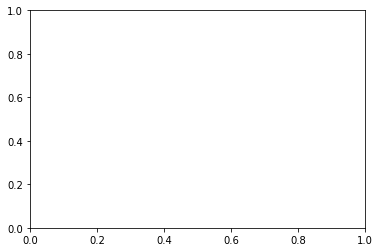

In [89]:
x = tobaccosmoke['Tobacco smoking']
y= tobaccosmoke['Entity']
z = tobaccosmoke['Year']

ax,fig = plt.subplot()
ax.plot(y,x)
ax.plot(z,x)
plt.show()

In [83]:
x = tobaccosmoke['Year']
y= tobaccosmoke['Tobacco smoking']
z = tobaccosmoke['Entity']
#plt.bar(x,y)

In [78]:
tobaccosmoke.groupby('Entity')
tobaccosmoke.values_counts()

AttributeError: 'DataFrame' object has no attribute 'values_counts'

In [49]:
#could pass dropna a subset of columns to drop based on if they are null
#by changing how = all or how = any can dicatate if we want to drop rows based on if all of the columns are null or just 1
df_new.dropna(subset= ['70+ years old (deaths)','15-49 years old (deaths)','50-69 years old (deaths)','Cigarette consumption per smoker per day (cigarettes)'],how = 'all')

,Entity,Code,Year,70+ years old (deaths),15-49 years old (deaths),50-69 years old (deaths),(% of adults)_x,Tobacco smoking,"Number of daily smokers - both (IHME, GHDx (2012))",Cigarette consumption per smoker per day (cigarettes),(% of adults)_y,Indicator:Average - cigarette price in international dollars (international-$)
0,Afghanistan,AFG,1990,1246.238030,2053.685070,3497.160641,NaN,6797.0,652030.0,5.800000,NaN,NaN
1,Afghanistan,AFG,1995,1974.935625,3094.630541,5519.810761,NaN,10589.0,1028533.0,4.500000,NaN,NaN
2,Afghanistan,AFG,2000,2429.371353,3757.903014,6799.480998,NaN,12987.0,1228925.0,3.700000,NaN,NaN
3,Afghanistan,AFG,2005,2848.213811,4537.789004,8483.815984,NaN,15870.0,1504433.0,4.000000,NaN,NaN
4,Afghanistan,AFG,2006,2951.940806,4653.880863,8730.749271,NaN,16337.0,1553745.0,4.100000,NaN,NaN
5,Afghanistan,AFG,2010,3306.430594,4953.975423,9416.096613,NaN,17677.0,1743624.0,4.900000,NaN,NaN
6,Afghanistan,AFG,2016,4057.745075,5888.611941,11005.558639,NaN,20952.0,NaN,NaN,NaN,NaN
7,Albania,ALB,1990,1118.952520,195.664903,976.852299,NaN,2291.0,482850.0,16.400000,NaN,NaN
8,Albania,ALB,1995,1210.307920,207.313356,1059.088298,NaN,2477.0,483593.0,16.100000,NaN,NaN
9,Albania,ALB,2000,1471.491695,288.469209,1164.872762,56.9,2925.0,461078.0,16.799999,11.6,NaN


In [51]:
#forward filled and back filled the dataframe so that all rows have values, accuracy is probably low
#can limit how far to forward and backward fill
df_fill_forward = df_new.fillna(method ='ffill')
df_fill_forward.fillna(method= 'bfill')
df_fill_forward.set_index('Entity').head()

,Code,Year,70+ years old (deaths),15-49 years old (deaths),50-69 years old (deaths),(% of adults)_x,Tobacco smoking,"Number of daily smokers - both (IHME, GHDx (2012))",Cigarette consumption per smoker per day (cigarettes),(% of adults)_y,Indicator:Average - cigarette price in international dollars (international-$)
Entity,,,,,,,,,,,
Afghanistan,AFG,1990,1246.238030,2053.685070,3497.160641,NaN,6797.0,652030.0,5.8,NaN,NaN
Afghanistan,AFG,1995,1974.935625,3094.630541,5519.810761,NaN,10589.0,1028533.0,4.5,NaN,NaN
Afghanistan,AFG,2000,2429.371353,3757.903014,6799.480998,NaN,12987.0,1228925.0,3.7,NaN,NaN
Afghanistan,AFG,2005,2848.213811,4537.789004,8483.815984,NaN,15870.0,1504433.0,4.0,NaN,NaN
Afghanistan,AFG,2006,2951.940806,4653.880863,8730.749271,NaN,16337.0,1553745.0,4.1,NaN,NaN


In [44]:
#interpolate will gradually change the numbers
df_interpolate= df_new.interpolate(method= 'nearest',limit_direction= 'both')
df_interpolate

,Entity,Code,Year,70+ years old (deaths),15-49 years old (deaths),50-69 years old (deaths),(% of adults)_x,Tobacco smoking,"Number of daily smokers - both (IHME, GHDx (2012))",Cigarette consumption per smoker per day (cigarettes),(% of adults)_y,Indicator:Average - cigarette price in international dollars (international-$)
0,Afghanistan,AFG,1990,1246.238030,2053.685070,3497.160641,NaN,6797.0,652030.0,5.800000,NaN,NaN
1,Afghanistan,AFG,1995,1974.935625,3094.630541,5519.810761,NaN,10589.0,1028533.0,4.500000,NaN,NaN
2,Afghanistan,AFG,2000,2429.371353,3757.903014,6799.480998,NaN,12987.0,1228925.0,3.700000,NaN,NaN
3,Afghanistan,AFG,2005,2848.213811,4537.789004,8483.815984,NaN,15870.0,1504433.0,4.000000,NaN,NaN
4,Afghanistan,AFG,2006,2951.940806,4653.880863,8730.749271,NaN,16337.0,1553745.0,4.100000,NaN,NaN
5,Afghanistan,AFG,2010,3306.430594,4953.975423,9416.096613,NaN,17677.0,1743624.0,4.900000,NaN,NaN
6,Afghanistan,AFG,2016,4057.745075,5888.611941,11005.558639,NaN,20952.0,1743624.0,4.900000,NaN,NaN
7,Albania,ALB,1990,1118.952520,195.664903,976.852299,NaN,2291.0,482850.0,16.400000,NaN,NaN
8,Albania,ALB,1995,1210.307920,207.313356,1059.088298,NaN,2477.0,483593.0,16.100000,NaN,NaN
9,Albania,ALB,2000,1471.491695,288.469209,1164.872762,56.9,2925.0,461078.0,16.799999,11.6,NaN
